In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp
from astroNN.nn.layers import MCDropout

### In this notebook, we use a compressed version of JLA compilation
#### First, we load the trained AutoEncoder

In [2]:
np.random.seed(0)

In [3]:
decoder = tf.keras.models.load_model('../models/decoderJLA.h5')
autoencoder = tf.keras.models.load_model('../models/autoencoderJLA.h5')
encoder = tf.keras.models.load_model('../models/encoderJLA.h5')
file2 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)

shuffle = [x for x in range(len(data.values)) if x%2 == 0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)


z = data.values[:,0][shuffle]
dl = data.values[:,1:][shuffle]

scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))

avg_encoded = np.loadtxt('/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/notebooks/avg_encoded.txt')

# FFNN

In [4]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
z_train, z_test = np.split(z, indx)

scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
dl_train, dl_test = np.split(dll, indx)



In [5]:
def model2_dropout(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
    x = MCDropout(0.01)(efirst)
    x = Dense(100, activation='relu')(efirst)
    x = MCDropout(0.01)(x)
    x = Dense(100, activation='relu')(x)
    x = MCDropout(0.01)(x)
    x = Dense(30, activation='relu')(x)
    x = MCDropout(0.01)(x)
    elast = Dense(1, activation='linear')(x)
    return elast

input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model2_dropout(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
MCDropout_2 (MCDropout)      (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
MCDropout_3 (MCDropout)      (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030  

In [6]:
model2_train = neural_model2.fit(z_train, dl_train, batch_size=1,
                                    epochs=10000,verbose=1,
                                    validation_data=(z_test, dl_test))
#                                     callbacks=callbacks)

Epoch 1/10000
24/24 [==============================] - 1s 13ms/step - loss: 0.6829 - val_loss: 0.8596
Epoch 2/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.7610 - val_loss: 0.4150
Epoch 3/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.7394 - val_loss: 0.0978
Epoch 4/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.2959 - val_loss: 0.0511
Epoch 5/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.1291 - val_loss: 0.0252
Epoch 6/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0799 - val_loss: 0.0087
Epoch 7/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0600 - val_loss: 0.0096
Epoch 8/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0213
Epoch 9/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0700 - val_loss: 0.0180
Epoch 10/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0924 - val_l

24/24 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 6.4082e-04
Epoch 82/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 83/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0262
Epoch 84/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.0325
Epoch 85/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0152
Epoch 86/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0068
Epoch 87/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 88/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0039
Epoch 89/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0102
Epoch 90/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss

Epoch 161/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0066
Epoch 162/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0047
Epoch 163/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0073
Epoch 164/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0040
Epoch 165/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0164
Epoch 166/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0205
Epoch 167/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0011
Epoch 168/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0012
Epoch 169/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0018
Epoch 170/10000
24/24 [==============================] - 0s 2ms/step - lo

24/24 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0190
Epoch 241/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 7.5007e-04
Epoch 242/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0035
Epoch 243/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 244/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.0458
Epoch 245/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0101
Epoch 246/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0167
Epoch 247/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 248/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0042
Epoch 249/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0048 -

24/24 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0207
Epoch 320/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0011
Epoch 321/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 7.3762e-04
Epoch 322/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 323/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0070
Epoch 324/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0141
Epoch 325/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0039
Epoch 326/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0027
Epoch 327/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0015
Epoch 328/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0063 -

24/24 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 399/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0036
Epoch 400/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 401/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 402/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0088
Epoch 403/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0031
Epoch 404/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0086
Epoch 405/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0107
Epoch 406/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0035
Epoch 407/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val

24/24 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0077
Epoch 478/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 479/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0042
Epoch 480/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 481/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 482/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0164
Epoch 483/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0053
Epoch 484/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 485/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 486/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val

24/24 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0058
Epoch 557/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 558/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 559/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 8.5478e-04
Epoch 560/10000
24/24 [==============================] - 0s 1ms/step - loss: 8.6171e-04 - val_loss: 0.0025
Epoch 561/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 562/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 4.0473e-04
Epoch 563/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 564/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0118
Epoch 565/10000
24/24 [==============================] - 0s 1ms/step - loss: 

24/24 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0055
Epoch 636/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0082
Epoch 637/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 638/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 639/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0035
Epoch 640/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0424 - val_loss: 0.0080
Epoch 641/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0075
Epoch 642/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0055
Epoch 643/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0023
Epoch 644/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0083 - val

24/24 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0078
Epoch 715/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0034
Epoch 716/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 717/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0016
Epoch 718/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 719/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0036
Epoch 720/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0019
Epoch 721/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 722/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0021
Epoch 723/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val

24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0057
Epoch 794/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0153
Epoch 795/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0101
Epoch 796/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 797/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 798/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0064
Epoch 799/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0041
Epoch 800/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0023
Epoch 801/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0132
Epoch 802/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0081 - val

24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0047
Epoch 873/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0057
Epoch 874/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 875/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0125
Epoch 876/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0399
Epoch 877/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0056
Epoch 878/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0057
Epoch 879/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0068
Epoch 880/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 881/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val

24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 952/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0017
Epoch 953/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0014
Epoch 954/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0061
Epoch 955/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 9.2903e-04
Epoch 956/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0024
Epoch 957/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 958/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0095
Epoch 959/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0038
Epoch 960/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 -

24/24 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 1031/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 1032/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0067
Epoch 1033/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 1034/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 6.4393e-04
Epoch 1035/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 1036/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0054
Epoch 1037/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0017
Epoch 1038/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0145
Epoch 1039/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 1109/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 1110/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 1111/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.0209
Epoch 1112/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0071
Epoch 1113/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0082
Epoch 1114/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 1115/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0041
Epoch 1116/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 1117/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0044
Epoch 1187/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 1188/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 1189/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 1190/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 1191/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 1192/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0083
Epoch 1193/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0011
Epoch 1194/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0021
Epoch 1195/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 1265/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 8.6660e-04
Epoch 1266/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0050
Epoch 1267/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0014
Epoch 1268/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0020
Epoch 1269/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 9.9058e-04
Epoch 1270/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 5.5704e-04
Epoch 1271/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0032
Epoch 1272/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0043
Epoch 1273/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 7.9328e-04
Epoch 1343/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 1344/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 8.7678e-04
Epoch 1345/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 7.0867e-04
Epoch 1346/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 1347/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 1348/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 1349/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 1350/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0107
Epoch 1351/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 1421/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0060
Epoch 1422/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0110
Epoch 1423/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 7.9104e-04
Epoch 1424/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 1425/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 1426/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0015
Epoch 1427/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0084
Epoch 1428/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0039
Epoch 1429/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0035
Epoch 1499/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 7.5223e-04
Epoch 1500/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 9.9712e-04
Epoch 1501/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0112
Epoch 1502/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0101
Epoch 1503/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 3.5138e-04
Epoch 1504/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 1505/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0453
Epoch 1506/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0384 - val_loss: 0.0119
Epoch 1507/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0015
Epoch 1577/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1578/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0049
Epoch 1579/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 5.5892e-04
Epoch 1580/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 1581/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0119
Epoch 1582/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 1583/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0101
Epoch 1584/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0094
Epoch 1585/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0128
Epoch 1655/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0092
Epoch 1656/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0098
Epoch 1657/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0064
Epoch 1658/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 1659/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0070
Epoch 1660/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 1661/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0095
Epoch 1662/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0046
Epoch 1663/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 1733/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 1734/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 1735/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0022
Epoch 1736/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 4.2980e-04
Epoch 1737/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0141
Epoch 1738/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 1739/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0052
Epoch 1740/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 5.3861e-04
Epoch 1741/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 1811/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0088
Epoch 1812/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 1813/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 1814/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 1815/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 1816/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0083
Epoch 1817/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 1818/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 1819/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 1889/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0069
Epoch 1890/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0076
Epoch 1891/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 1892/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 6.7963e-04
Epoch 1893/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 1894/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0050
Epoch 1895/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 1896/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 1897/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 7.4125e-04
Epoch 1967/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1968/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1969/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0063
Epoch 1970/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 1971/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 1972/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0055
Epoch 1973/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0029
Epoch 1974/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.0019
Epoch 1975/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 2045/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 2046/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0085
Epoch 2047/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 2048/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 2049/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 2050/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0090
Epoch 2051/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0030
Epoch 2052/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 2053/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 2123/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 2124/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0066
Epoch 2125/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 2126/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 2127/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 2128/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.6723e-04 - val_loss: 0.0010
Epoch 2129/10000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0087
Epoch 2130/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 2131/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 2201/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 2202/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 2203/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0071
Epoch 2204/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 6.7089e-04
Epoch 2205/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 2206/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.9490e-04 - val_loss: 0.0016
Epoch 2207/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 2208/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 2209/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0087
Epoch 2279/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0210
Epoch 2280/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0039
Epoch 2281/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 2282/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0011
Epoch 2283/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 2284/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 2285/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 2286/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0037
Epoch 2287/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 2357/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 2358/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0120
Epoch 2359/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 2360/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0012
Epoch 2361/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 2362/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 2363/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 6.9582e-04
Epoch 2364/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0061
Epoch 2365/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0100
Epoch 2435/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0016
Epoch 2436/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 2437/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0017
Epoch 2438/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0146
Epoch 2439/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0276
Epoch 2440/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0037
Epoch 2441/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 2442/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0069
Epoch 2443/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

Epoch 2512/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 2513/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 2514/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 2515/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 2516/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 2517/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 2518/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 2519/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0111
Epoch 2520/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2521/10000
24/24 [==============================] - 0s 2ms

24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0092
Epoch 2591/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 2592/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 2593/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0014
Epoch 2594/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.0080
Epoch 2595/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 2596/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2597/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 8.7150e-04
Epoch 2598/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 9.3803e-04
Epoch 2599/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 8.3514e-04
Epoch 2669/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0024
Epoch 2670/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 2671/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 2672/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 8.5193e-04
Epoch 2673/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0096
Epoch 2674/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0017
Epoch 2675/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 2676/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 9.1687e-04
Epoch 2677/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 2747/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 2748/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 2749/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0050
Epoch 2750/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0040
Epoch 2751/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 2752/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0011
Epoch 2753/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 2754/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0055
Epoch 2755/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 2825/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0129
Epoch 2826/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0094
Epoch 2827/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.0123
Epoch 2828/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 2829/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 2830/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2831/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 2832/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 2833/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 2903/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 2904/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 2905/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0296
Epoch 2906/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0026
Epoch 2907/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0024
Epoch 2908/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0026
Epoch 2909/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0056
Epoch 2910/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0010
Epoch 2911/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.9

24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 2981/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 5.1825e-04
Epoch 2982/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 9.0301e-04
Epoch 2983/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 2984/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 8.2448e-04
Epoch 2985/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0018
Epoch 2986/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 2987/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 4.7811e-04
Epoch 2988/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 2989/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 3059/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 3060/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 3061/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 3062/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.4954e-04 - val_loss: 5.1045e-04
Epoch 3063/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 3064/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 3065/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 3066/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 3067/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 7.5202e-04
Epoch 3137/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 3138/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 5.3485e-04
Epoch 3139/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0056
Epoch 3140/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0021
Epoch 3141/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 6.4608e-04
Epoch 3142/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 3143/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 8.7671e-04
Epoch 3144/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0043
Epoch 3145/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 3215/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 3216/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 3217/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 3218/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0054
Epoch 3219/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 3220/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0055
Epoch 3221/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0012
Epoch 3222/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 3223/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0089
Epoch 3293/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0090
Epoch 3294/10000
24/24 [==============================] - ETA: 0s - loss: 1.8799e-0 - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 3295/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0214
Epoch 3296/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0074
Epoch 3297/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 7.5969e-04
Epoch 3298/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 3299/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0103
Epoch 3300/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.4678e-04 - val_loss: 0.0042
Epoch 3301/10000
24/24 [=====================

24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 3371/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0092
Epoch 3372/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 3373/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 3374/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 5.6953e-04
Epoch 3375/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 3376/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 3377/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0059
Epoch 3378/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 3379/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 5.3817e-04
Epoch 3449/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 6.1674e-04
Epoch 3450/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 9.7142e-04
Epoch 3451/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0051
Epoch 3452/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0059
Epoch 3453/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3454/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 3455/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0101
Epoch 3456/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0012
Epoch 3457/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 3527/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 3528/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 3529/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 3530/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 5.3943e-04
Epoch 3531/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0094
Epoch 3532/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0017
Epoch 3533/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0071
Epoch 3534/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0037
Epoch 3535/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0455
Epoch 3605/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 3.8726e-04
Epoch 3606/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0169
Epoch 3607/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0076
Epoch 3608/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0098
Epoch 3609/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3610/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 3611/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 3612/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0077
Epoch 3613/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0248
Epoch 3683/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 3684/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0368
Epoch 3685/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.9477e-04 - val_loss: 0.0034
Epoch 3686/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3687/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 3688/10000
24/24 [==============================] - 0s 2ms/step - loss: 3.1991e-04 - val_loss: 6.4565e-04
Epoch 3689/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0084
Epoch 3690/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0061
Epoch 3691/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 3761/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 7.8919e-04
Epoch 3762/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 9.5901e-04
Epoch 3763/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0173
Epoch 3764/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 3765/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.0340e-04 - val_loss: 0.0032
Epoch 3766/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 3767/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 8.8298e-04
Epoch 3768/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3769/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 3839/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 3840/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 3841/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3842/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 3843/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0063
Epoch 3844/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 3845/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0139
Epoch 3846/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0029
Epoch 3847/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 8.4300e-04
Epoch 3917/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 3918/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 3919/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 3920/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 3921/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0065
Epoch 3922/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 3923/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0053
Epoch 3924/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 3925/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0054
Epoch 3995/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 5.9521e-04
Epoch 3996/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 3997/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0076
Epoch 3998/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0060
Epoch 3999/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 4000/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.9701e-04 - val_loss: 0.0032
Epoch 4001/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.5963e-04 - val_loss: 0.0020
Epoch 4002/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4003/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0078
Epoch 4073/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 4074/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0026
Epoch 4075/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 4.6256e-04
Epoch 4076/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0030
Epoch 4077/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 6.8750e-04
Epoch 4078/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0018
Epoch 4079/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 7.5987e-04
Epoch 4080/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 4.5540e-04
Epoch 4081/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 4150/10000
24/24 [==============================] - 0s 2ms/step - loss: 6.3228e-04 - val_loss: 7.8586e-04
Epoch 4151/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 7.0451e-04
Epoch 4152/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 4153/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 4154/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 4155/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 4156/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0066
Epoch 4157/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 5.5495e-04
Epoch 4158/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 4227/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 4228/10000
24/24 [==============================] - 0s 2ms/step - loss: 4.0049e-04 - val_loss: 0.0026
Epoch 4229/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 7.1223e-04
Epoch 4230/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 4231/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 9.3950e-04
Epoch 4232/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 4233/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0193
Epoch 4234/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 4235/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0063
Epoch 4305/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 4306/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 4307/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 4308/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4309/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 4310/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 4311/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0075
Epoch 4312/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 4313/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 4383/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 4384/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0034
Epoch 4385/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 4386/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 4387/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 4388/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 5.7496e-04
Epoch 4389/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 4390/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.1906e-04 - val_loss: 0.0057
Epoch 4391/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 4461/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4462/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 4463/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 4464/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 4465/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 4466/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 4467/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 4468/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 4469/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0111
Epoch 4539/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 4540/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 4541/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0109
Epoch 4542/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0014
Epoch 4543/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0101
Epoch 4544/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.7070e-04 - val_loss: 0.0044
Epoch 4545/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 4546/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0058
Epoch 4547/10000
24/24 [==============================] - 0s 2ms/step - loss:

Epoch 4616/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 4617/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 4618/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0078
Epoch 4619/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 4620/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 4621/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 4622/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 4623/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0019
Epoch 4624/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 6.0380e-04
Epoch 4625/10000
24/24 [==============================] - 0s

24/24 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 4695/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 4696/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0083
Epoch 4697/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 4698/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0014
Epoch 4699/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0071
Epoch 4700/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0231
Epoch 4701/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 4702/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 4703/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0089
Epoch 4773/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 4774/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0043
Epoch 4775/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0063
Epoch 4776/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0067
Epoch 4777/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 4778/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0143
Epoch 4779/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0173
Epoch 4780/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 4781/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0024
Epoch 4851/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 4852/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4853/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0142
Epoch 4854/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 3.0315e-04
Epoch 4855/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 9.4222e-04
Epoch 4856/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 6.4003e-04
Epoch 4857/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0135
Epoch 4858/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4859/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 4929/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 4930/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 4931/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0058
Epoch 4932/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 4933/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 4934/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.4318e-04 - val_loss: 0.0016
Epoch 4935/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0034
Epoch 4936/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 7.8623e-04
Epoch 4937/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0128
Epoch 5007/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 5008/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 5009/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0023
Epoch 5010/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 7.1106e-04
Epoch 5011/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0071
Epoch 5012/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0190
Epoch 5013/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 9.2656e-04
Epoch 5014/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0062
Epoch 5015/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 5085/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 5086/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0148
Epoch 5087/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 5088/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0098
Epoch 5089/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 5090/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0052
Epoch 5091/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 5092/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 5093/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0011
Epoch 5163/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 5164/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 5165/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 5.4557e-04
Epoch 5166/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.2349
Epoch 5167/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0203
Epoch 5168/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 5169/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0034
Epoch 5170/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0022
Epoch 5171/10000
24/24 [==============================] - 0s 2ms/step - loss:

Epoch 5240/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 5241/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0049
Epoch 5242/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.8223e-04 - val_loss: 0.0021
Epoch 5243/10000
24/24 [==============================] - 0s 2ms/step - loss: 6.3522e-04 - val_loss: 3.8966e-04
Epoch 5244/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0055
Epoch 5245/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 4.0389e-04
Epoch 5246/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0094
Epoch 5247/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 5248/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5249/10000
24/24 [========================

24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 5319/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 5320/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 5321/10000
24/24 [==============================] - 0s 2ms/step - loss: 4.9271e-04 - val_loss: 0.0030
Epoch 5322/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0058
Epoch 5323/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 5324/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0100
Epoch 5325/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0090
Epoch 5326/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0097
Epoch 5327/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 8.8103e-04 - val_loss: 0.0022
Epoch 5397/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 5398/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 5399/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 5400/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 5401/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 5402/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0097
Epoch 5403/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0080
Epoch 5404/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 5405/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 5475/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 5476/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.5348e-04 - val_loss: 0.0019
Epoch 5477/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 5478/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 4.3073e-04
Epoch 5479/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0025
Epoch 5480/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 5481/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0059
Epoch 5482/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0102
Epoch 5483/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 5553/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 5554/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 5555/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0173
Epoch 5556/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 3.8852e-04
Epoch 5557/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0081
Epoch 5558/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 5559/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 5560/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 5561/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0029
Epoch 5631/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 5632/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.9660e-04 - val_loss: 7.4365e-04
Epoch 5633/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 5634/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0042
Epoch 5635/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0180
Epoch 5636/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0052
Epoch 5637/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 5.7357e-04
Epoch 5638/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 9.9389e-04
Epoch 5639/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0046
Epoch 5709/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0082
Epoch 5710/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 5711/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 5712/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0068
Epoch 5713/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 5714/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.8754e-04 - val_loss: 0.0025
Epoch 5715/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 5.8835e-04
Epoch 5716/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0060
Epoch 5717/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 5787/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0057
Epoch 5788/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 5789/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 6.2342e-04
Epoch 5790/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 5791/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 5792/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 5793/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0108
Epoch 5794/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 5795/10000
24/24 [==============================] - 0s 3ms/step - loss:

Epoch 5864/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 5865/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 5866/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 5867/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 5868/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5869/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 5870/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 5871/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 5872/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 4.0071e-04
Epoch 5873/10000
24/24 [==============================] - 0s

24/24 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0072
Epoch 5943/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0022
Epoch 5944/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 5945/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 5946/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 9.6448e-04
Epoch 5947/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5948/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0072
Epoch 5949/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 5950/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0117
Epoch 5951/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 6.2320e-04
Epoch 6021/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6022/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 6023/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 6024/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6025/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 5.3200e-04
Epoch 6026/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 8.8018e-04
Epoch 6027/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 6028/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 6029/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 6099/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0024
Epoch 6100/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0102
Epoch 6101/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 8.7776e-04
Epoch 6102/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 6103/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 6104/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.4078e-04 - val_loss: 0.0024
Epoch 6105/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.8384e-04 - val_loss: 0.0019
Epoch 6106/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0091
Epoch 6107/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 9.0317e-04
Epoch 6177/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0041
Epoch 6178/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 6179/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 6180/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0128
Epoch 6181/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.4005e-04 - val_loss: 0.0127
Epoch 6182/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 6.9398e-04
Epoch 6183/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 6184/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 6185/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6255/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0076
Epoch 6256/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0057
Epoch 6257/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 6258/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6259/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 6260/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 6261/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 6262/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0078
Epoch 6263/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 8.2880e-04 - val_loss: 0.0044
Epoch 6333/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0059
Epoch 6334/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 7.9041e-04
Epoch 6335/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0019
Epoch 6336/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 6337/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6338/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 6339/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 9.9866e-04
Epoch 6340/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.1800e-04 - val_loss: 0.0013
Epoch 6341/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0192
Epoch 6411/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0060
Epoch 6412/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 6413/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0022
Epoch 6414/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 6415/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 6416/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 6417/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6418/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6419/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 9.6706e-04
Epoch 6489/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0061
Epoch 6490/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 6491/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 6492/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 8.1985e-04
Epoch 6493/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 6494/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0047
Epoch 6495/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 6496/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 6497/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 6567/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 6.9916e-04
Epoch 6568/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0060
Epoch 6569/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0049
Epoch 6570/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 8.6011e-04
Epoch 6571/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0051
Epoch 6572/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 6573/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0073
Epoch 6574/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0084
Epoch 6575/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0081
Epoch 6645/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0084
Epoch 6646/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 6647/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6648/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0070
Epoch 6649/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 6650/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6651/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 6652/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0027
Epoch 6653/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0047
Epoch 6723/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 6724/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 6725/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0051
Epoch 6726/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 6727/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 6728/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 6729/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0116
Epoch 6730/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 6731/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 6.8067e-04 - val_loss: 4.9352e-04
Epoch 6801/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6802/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 6803/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 5.1862e-04
Epoch 6804/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 9.8442e-04
Epoch 6805/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 6.2852e-04
Epoch 6806/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 6807/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0022
Epoch 6808/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 3.8472e-04
Epoch 6809/10000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 6879/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 7.3411e-04
Epoch 6880/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 6881/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 6882/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 6883/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.2066e-04 - val_loss: 0.0036
Epoch 6884/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 6885/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 6886/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0051
Epoch 6887/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 6.3305e-04 - val_loss: 0.0018
Epoch 6957/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0051
Epoch 6958/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0119
Epoch 6959/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 6960/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.6954e-04 - val_loss: 0.0013
Epoch 6961/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 6962/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 6963/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0055
Epoch 6964/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.1892e-04 - val_loss: 0.0017
Epoch 6965/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 3.8982e-04
Epoch 7035/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0065
Epoch 7036/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0156
Epoch 7037/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 8.9094e-04
Epoch 7038/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 7039/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 4.5901e-04
Epoch 7040/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 4.2983e-04
Epoch 7041/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0050
Epoch 7042/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 7043/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0127
Epoch 7113/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0152
Epoch 7114/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 7115/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 7116/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0055
Epoch 7117/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 7118/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 7.1776e-04
Epoch 7119/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.0117e-04 - val_loss: 0.0021
Epoch 7120/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.7475e-04 - val_loss: 0.0028
Epoch 7121/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 7.8425e-04 - val_loss: 0.0028
Epoch 7191/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 7192/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0147
Epoch 7193/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0192
Epoch 7194/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0064
Epoch 7195/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0070
Epoch 7196/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0073
Epoch 7197/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0019
Epoch 7198/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 6.9845e-04
Epoch 7199/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0067
Epoch 7269/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.0013
Epoch 7270/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 7271/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 7272/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 7273/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 9.8574e-04
Epoch 7274/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 7275/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 7276/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7277/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 7347/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 7348/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0031
Epoch 7349/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 7350/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 7351/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 7352/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 7353/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 7354/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0058
Epoch 7355/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0089
Epoch 7425/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 7426/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 7427/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 7428/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 7429/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.5475e-04 - val_loss: 0.0011
Epoch 7430/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 7431/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 7432/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.7391e-04 - val_loss: 0.0028
Epoch 7433/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0113
Epoch 7503/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0076
Epoch 7504/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0096
Epoch 7505/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 7506/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7507/10000
24/24 [==============================] - 0s 2ms/step - loss: 6.3027e-04 - val_loss: 0.0019
Epoch 7508/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 6.9370e-04
Epoch 7509/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0055
Epoch 7510/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0053
Epoch 7511/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 3.8188e-04
Epoch 7581/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 7582/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 7583/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 7584/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 6.1264e-04
Epoch 7585/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 7586/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 7587/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 7588/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 7589/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 7659/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 7660/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 7661/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 7662/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 7.4660e-04
Epoch 7663/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0051
Epoch 7664/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 7665/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0043
Epoch 7666/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 7667/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 7737/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7738/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 7739/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 7740/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0062
Epoch 7741/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0112
Epoch 7742/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7743/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 7744/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 9.7305e-04
Epoch 7745/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 7815/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 7816/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 7817/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0034
Epoch 7818/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.7135e-04 - val_loss: 0.0015
Epoch 7819/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.3562e-04 - val_loss: 0.0027
Epoch 7820/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 5.8615e-04
Epoch 7821/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 2.6663e-04
Epoch 7822/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 7823/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7893/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.3269e-04 - val_loss: 0.0010
Epoch 7894/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 7895/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.1168e-04 - val_loss: 0.0095
Epoch 7896/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 3.5461e-04
Epoch 7897/10000
24/24 [==============================] - 0s 2ms/step - loss: 6.9762e-04 - val_loss: 0.0021
Epoch 7898/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 7899/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 7900/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0084
Epoch 7901/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 6.2365e-04
Epoch 7971/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0073
Epoch 7972/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7973/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0075
Epoch 7974/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 7975/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 7976/10000
24/24 [==============================] - 0s 2ms/step - loss: 3.2591e-04 - val_loss: 0.0057
Epoch 7977/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.6574e-04 - val_loss: 0.0058
Epoch 7978/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 7979/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 8049/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0074
Epoch 8050/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0084
Epoch 8051/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 8052/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0012
Epoch 8053/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 8054/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0078
Epoch 8055/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 8056/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 8057/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 7.8963e-04
Epoch 8127/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.9013e-04 - val_loss: 0.0015
Epoch 8128/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.1094e-04 - val_loss: 0.0011
Epoch 8129/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0121
Epoch 8130/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0142
Epoch 8131/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0059
Epoch 8132/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 8133/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 8134/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.9683e-04 - val_loss: 0.0069
Epoch 8135/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0113
Epoch 8205/10000
24/24 [==============================] - 0s 2ms/step - loss: 6.7191e-04 - val_loss: 0.0077
Epoch 8206/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0128
Epoch 8207/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0012
Epoch 8208/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0139
Epoch 8209/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0076
Epoch 8210/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 8211/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 9.9371e-04
Epoch 8212/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 6.5191e-04
Epoch 8213/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 8283/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 8284/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 8285/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 8286/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 8287/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.8885e-04 - val_loss: 0.0019
Epoch 8288/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 8289/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.0968e-04 - val_loss: 0.0051
Epoch 8290/10000
24/24 [==============================] - 0s 2ms/step - loss: 4.0382e-04 - val_loss: 0.0013
Epoch 8291/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 8.5281e-04
Epoch 8361/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 8362/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 8363/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 8364/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 8365/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 8366/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0062
Epoch 8367/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0943
Epoch 8368/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0073
Epoch 8369/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 8439/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0077
Epoch 8440/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0074
Epoch 8441/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 8442/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 8443/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 8444/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.1991e-04 - val_loss: 7.8637e-04
Epoch 8445/10000
24/24 [==============================] - 0s 2ms/step - loss: 2.9848e-04 - val_loss: 0.0034
Epoch 8446/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0038
Epoch 8447/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 8.1752e-04 - val_loss: 0.0034
Epoch 8517/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0093
Epoch 8518/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 8519/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 8520/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 8521/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0078
Epoch 8522/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0064
Epoch 8523/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0154
Epoch 8524/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 8525/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8595/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8596/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8597/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 8598/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0083
Epoch 8599/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0013
Epoch 8600/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 8601/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 8602/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0076
Epoch 8603/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 8673/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.9430e-04 - val_loss: 0.0068
Epoch 8674/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0011
Epoch 8675/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8676/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0059
Epoch 8677/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.0750e-04 - val_loss: 7.2801e-04
Epoch 8678/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 8679/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8680/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0089
Epoch 8681/10000
24/24 [==============================] - 0s 2ms/step

Epoch 8750/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0012
Epoch 8751/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 8752/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.5020e-04 - val_loss: 0.0044
Epoch 8753/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 6.2282e-04
Epoch 8754/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 9.8307e-04
Epoch 8755/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.9052e-04 - val_loss: 0.0076
Epoch 8756/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 8757/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 8758/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.7377e-04 - val_loss: 0.0050
Epoch 8759/10000
24/24 [====================

24/24 [==============================] - 0s 2ms/step - loss: 5.2171e-04 - val_loss: 8.8839e-04
Epoch 8828/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0081
Epoch 8829/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 8830/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 8831/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 8832/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 8833/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 8834/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.7583e-04 - val_loss: 0.0018
Epoch 8835/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 8836/10000
24/24 [==============================] - 0s 2ms/step

Epoch 8905/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0109
Epoch 8906/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0079
Epoch 8907/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0062
Epoch 8908/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 8909/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.6450e-04 - val_loss: 7.3055e-04
Epoch 8910/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8911/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.6759e-04 - val_loss: 0.0015
Epoch 8912/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.5812e-04 - val_loss: 0.0068
Epoch 8913/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 8914/10000
24/24 [========================

24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 8983/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 8984/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8985/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 9.3850e-04
Epoch 8986/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 8987/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0040
Epoch 8988/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 8989/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0101
Epoch 8990/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 5.7512e-04
Epoch 8991/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 9061/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 9062/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0079
Epoch 9063/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 9064/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0233
Epoch 9065/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 9066/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 9067/10000
24/24 [==============================] - 0s 3ms/step - loss: 6.5090e-04 - val_loss: 0.0021
Epoch 9068/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 9069/10000
24/24 [==============================] - 0s 2ms/step - loss:

24/24 [==============================] - 0s 2ms/step - loss: 9.1626e-04 - val_loss: 0.0076
Epoch 9139/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 9140/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0368
Epoch 9141/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0020
Epoch 9142/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.6578e-04 - val_loss: 7.9146e-04
Epoch 9143/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 9144/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 9145/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 9146/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.7253e-04 - val_loss: 0.0028
Epoch 9147/10000
24/24 [==============================] - 0s 3ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9217/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 9218/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 8.4467e-04
Epoch 9219/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0021
Epoch 9220/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 9221/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.1319e-04 - val_loss: 9.9571e-04
Epoch 9222/10000
24/24 [==============================] - 0s 3ms/step - loss: 6.9669e-04 - val_loss: 0.0011
Epoch 9223/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 9224/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 9225/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 4.7543e-04 - val_loss: 0.0045
Epoch 9294/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0236
Epoch 9295/10000
24/24 [==============================] - 0s 2ms/step - loss: 2.1748e-04 - val_loss: 0.0056
Epoch 9296/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.3295e-04 - val_loss: 0.0049
Epoch 9297/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 6.6904e-04
Epoch 9298/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0119
Epoch 9299/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 9300/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 9301/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 9302/10000
24/24 [==============================] - 0s 2ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0125
Epoch 9371/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0149
Epoch 9372/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0057
Epoch 9373/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 9374/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0224
Epoch 9375/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 9376/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 9377/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0116
Epoch 9378/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0055
Epoch 9379/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.2

Epoch 9448/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9449/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 9450/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.1844e-04 - val_loss: 5.6882e-04
Epoch 9451/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 9452/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 9453/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 9454/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.7947e-04 - val_loss: 3.6471e-04
Epoch 9455/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 4.0820e-04
Epoch 9456/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 9457/10000
24/24 [====================

24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0081
Epoch 9526/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 9527/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9528/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 9529/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 9530/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0107
Epoch 9531/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0010
Epoch 9532/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0080
Epoch 9533/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0050
Epoch 9534/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 9604/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 9605/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0080
Epoch 9606/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 9607/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0105
Epoch 9608/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0061
Epoch 9609/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 5.2398e-04
Epoch 9610/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 6.9350e-04
Epoch 9611/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0090
Epoch 9612/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 9682/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0056
Epoch 9683/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 9684/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 9685/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0104
Epoch 9686/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 5.2179e-04
Epoch 9687/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 8.2981e-04
Epoch 9688/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 9689/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.8162e-04 - val_loss: 0.0035
Epoch 9690/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0055
Epoch 9760/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 9761/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0121
Epoch 9762/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0074
Epoch 9763/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 9764/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 9765/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 9766/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 9767/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0026
Epoch 9768/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 9838/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 9839/10000
24/24 [==============================] - 0s 3ms/step - loss: 7.0900e-04 - val_loss: 0.0015
Epoch 9840/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0070
Epoch 9841/10000
24/24 [==============================] - 0s 2ms/step - loss: 8.5331e-04 - val_loss: 0.0039
Epoch 9842/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0259
Epoch 9843/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.4781e-04 - val_loss: 0.0031
Epoch 9844/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 9845/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0060
Epoch 9846/10000
24/24 [==============================] - 0s 2ms/step

Epoch 9915/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 9916/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 9917/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 7.8036e-04
Epoch 9918/10000
24/24 [==============================] - 0s 3ms/step - loss: 6.7118e-04 - val_loss: 0.0011
Epoch 9919/10000
24/24 [==============================] - 0s 3ms/step - loss: 6.3255e-04 - val_loss: 0.0048
Epoch 9920/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 9921/10000
24/24 [==============================] - 0s 3ms/step - loss: 6.6710e-04 - val_loss: 0.0022
Epoch 9922/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 9923/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 9924/10000
24/24 [========================

Epoch 9993/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 9994/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 9995/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0026
Epoch 9996/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 1.1550e-04
Epoch 9997/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 9998/10000
24/24 [==============================] - 0s 2ms/step - loss: 7.2831e-04 - val_loss: 9.2038e-04
Epoch 9999/10000
24/24 [==============================] - 0s 2ms/step - loss: 4.7656e-04 - val_loss: 0.0127
Epoch 10000/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.4244e-04 - val_loss: 0.0068


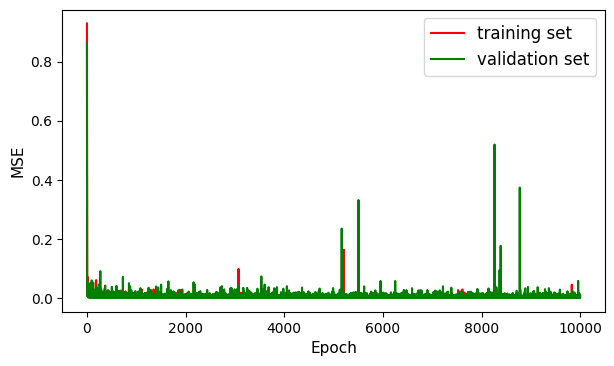

In [7]:
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model2_train.history['loss'], color='r', )
plt.plot(model2_train.history['val_loss'], color='g')

plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.title('FFNN+MC-DO', fontsize=8)

plt.savefig('loss_dropoutJLA2.png')

In [8]:
file3 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/notebooks/fake_binned_JLA.dat'
data3 = pd.read_csv(file3, names=['z', '$D_L$'], sep = " ", skiprows=3)

x_test = data.values[:,0]
# dl = data.values[:,1:][shuffle]
np.shape(x_test)

(31,)

In [9]:
test_batch_size = 31
# x_test = np.random.uniform(np.min(z), np.max(z), test_batch_size)
# x_test = np.linspace(np.min(z), np.max(z), test_batch_size)

mc_dropout_num = 100# Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 1))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    predictions[i] = neural_model2.predict(x_test)
    

# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0, dtype=np.float64)
std_mc_dropout = np.std(predictions, axis=0, dtype=np.float64)



In [10]:
Om = 0.27
# variance network
w0 = -1

# def RHSquared_a_lcdm(a):
# #         return Ezlcdm(a)**2
#     return Om*(1/a)**3 + 1 - Om

def RHSquared_a_owacdm(a, w0, wa):
#         return Ezlcdm(a)**2
    rhow = a**(-3*(1.0+w0+wa))*np.exp(-3*wa*(1-a))
    return (Om/a**3+(1.0-Om)*rhow)

def DistIntegrand_a(a, w0, wa):
#         if model == 'lcdm':
#             return 1./np.sqrt(RHSquared_a_lcdm(a))/a**2
#         elif model == 'owacdm':
        return 1./np.sqrt(RHSquared_a_owacdm(a, w0, wa))/a**2
    
def Da_z(z, w0, wa):
        # r=intg.quad(self.Hinv_z,0,z)
        # this version seems to be faster
        r = intg.quad(DistIntegrand_a, 1./(1+z), 1, args=(w0, wa))

        r = r[0]
      
        return r
    
def distance_modulus(z, w0=-1, wa=0.0):
        # I think this should also work with varyPrefactor as long as BAO is there too
        # assert(not self.varyPrefactor)

        # note that our Da_z is comoving, so we're only
        # multilpyting with a single (1+z) factor
#         return 5*np.log10(Da_z(z, model, w0, wa)*(1+z)) 
    return 5*np.log10(Da_z(z, w0, wa)*(1+z))+43



In [11]:
zmodel = np.linspace(0.01, 1.5, 100)
flcdm = []
fowacdm1 = []
# fowacdm2 = []
# fowacdm3 = []

# flcdm = []
for zzz in zmodel:
    flcdm.append(distance_modulus(zzz, w0=-1, wa=0))
#     fowacdm1.append(distance_modulus(zzz, w0=-1.3, wa=1.2))
    fowacdm1.append(distance_modulus(zzz, w0=-10, wa=-100))
#     fowacdm2.append(distance_modulus(zz, model='owacdm', w0=-1, wa=-0.5))
#     fowacdm3.append(distance_modulus(zz, model='owacdm', w0=-1, wa=0.0))
    
flcdm = np.array(flcdm)
fowacdm1 = np.array(fowacdm1)
# fowacdm2 = np.array(fowacdm2)
# fowacdm3 = np.array(fowacdm3)

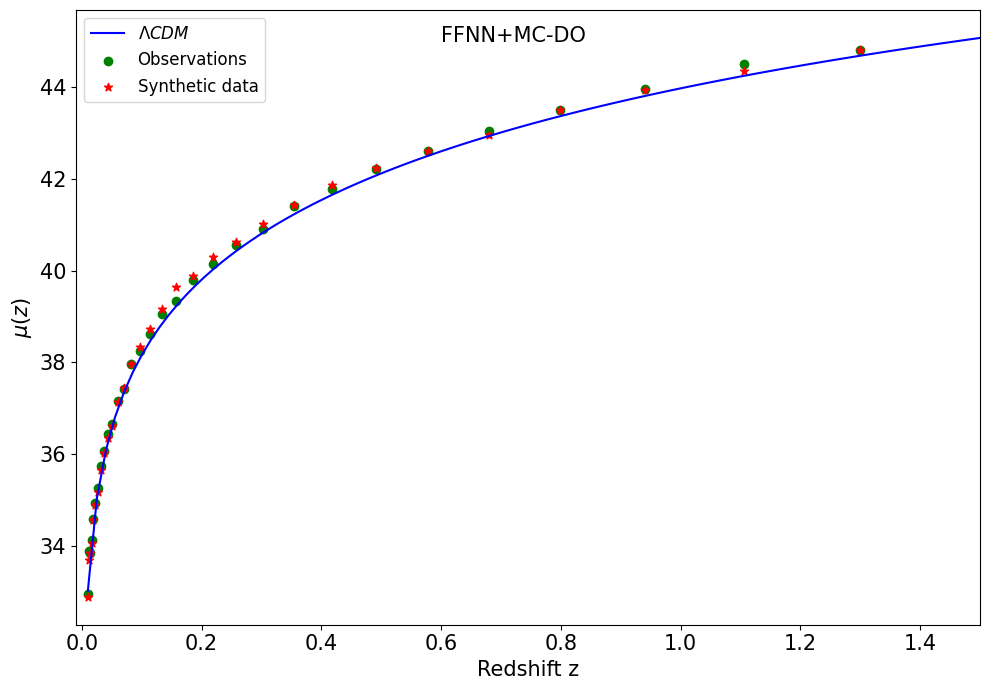

In [19]:
# Plotting
dlfake = scalerdl.inverse_transform(prediction_mc_dropout.reshape(-1,1))
plt.figure(figsize=(10, 7), dpi=100)

# fakeerrors = np.sqrt(np.abs(np.diagonal(decoded_fake.reshape(31,31))))
# sigma = np.sqrt(std_mc_dropout.reshape(31,))

plt.scatter(z, dl, c='g', label='Observations')
# plt.errorbar(z, dl, errors, fmt='g.', markersize=10, label='Observations')
plt.scatter(x_test, dlfake, marker='*', c='r', label='Synthetic data')

# plt.errorbar(x_test, dlfake, yerr=sigma
#              , markersize=10, fmt='.', 
#              ecolor='blue', capthick=2, elinewidth=0.9, alpha=0.8, c='r',
#              label='Synthetic data')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
plt.plot(zmodel, flcdm, label='$\Lambda CDM$', c='b')
# plt.plot(zmodel, fowacdm1, label='CPL $w_0 = -1.3, w_a=1.2$', c='m')
# plt.plot(zmodel, fowacdm2, label='$\omega_0\omega_aCDM \;\; \omega_a=-0.5$', c='y')
# plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(-0.01, np.max(z)+0.2)
plt.xlabel("Redshift z", fontsize=15)
plt.ylabel("$\mu(z)$", fontsize=15)
# plt.xlim(0, np.max(z))
plt.xticks(fontsize=15)
plt.text(0.6, 45, 'FFNN+MC-DO', fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.legend(loc='upper left', fontsize=12)
# plt.show()
# plt.savefig('DL_dropoutb2.png')

In [13]:
index = np.argsort(x_test)
fake_data2 = np.stack((x_test[index], dlfake.reshape(31,)[index]), axis=1)


# np.savetxt("fake_binned_JLADO.dat",  fake_data2, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')


In [14]:
# autoencoder.save('autoencoderJLA_DO.h5')
# decoder.save('decoderJLA_DO.h5')
# neural_model2.save('FFNN_JLA_DO.h5')
# encoder.save('encoderJLA_DO.h5')

In [15]:
# plt.figure(figsize=(5, 3), dpi=100)
# plt.plot(model_train.history['loss'], color='r', )
# plt.plot(model_train.history['val_loss'], color='g')
# plt.ylabel('MSE', fontsize=9)
# plt.xlabel('Epoch', fontsize=9)
# plt.legend(['training set', 'validation set'], loc='upper right', fontsize=8)
# plt.xticks(fontsize=7)
# plt.yticks(fontsize=7)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_hz.png", dpi=100)